# Example of shift detection using univariate data


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

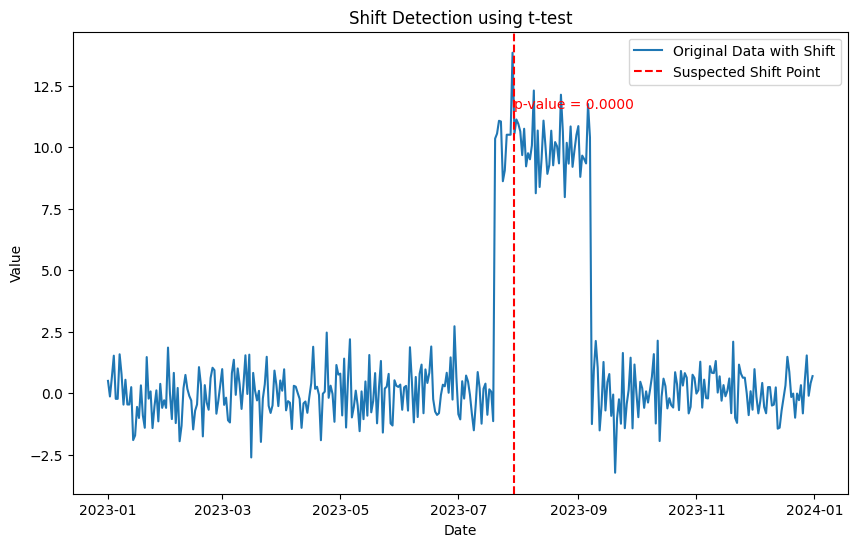

p_value:  1.0832384358029508e-08
The shift at point 210 is statistically significant.


In [5]:
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_shift = np.random.normal(loc=0, scale=1, size=len(date_rng))
data_shift[200:250] += 10

df_shift = pd.DataFrame(data_shift, columns=['Value'], index=date_rng)

shift_point = 210
data_before_shift = df_shift['Value'][:shift_point]
data_after_shift = df_shift['Value'][shift_point:]

_, p_value = ttest_ind(data_before_shift, data_after_shift, alternative='two-sided')

alpha = 0.05

plt.figure(figsize=(10, 6))
plt.plot(df_shift.index, df_shift['Value'], label='Original Data with Shift')
plt.axvline(x=df_shift.index[shift_point], color='red', linestyle='--', label='Suspected Shift Point')
plt.annotate(f'p-value = {p_value:.4f}', xy=(df_shift.index[shift_point], df_shift['Value'][shift_point] + 1), color='red')
plt.legend()
plt.title('Shift Detection using t-test')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

print("p_value: ", p_value)

if p_value < alpha:
    print(f"The shift at point {shift_point} is statistically significant.")
else:
    print(f"No statistically significant shift detected at point {shift_point}.")


Shift at point 200 is statistically significant.
Shift at point 210 is statistically significant.
Shift at point 220 is statistically significant.
No statistically significant shift detected at point 230.
Shift at point 240 is statistically significant.
Shift at point 250 is statistically significant.


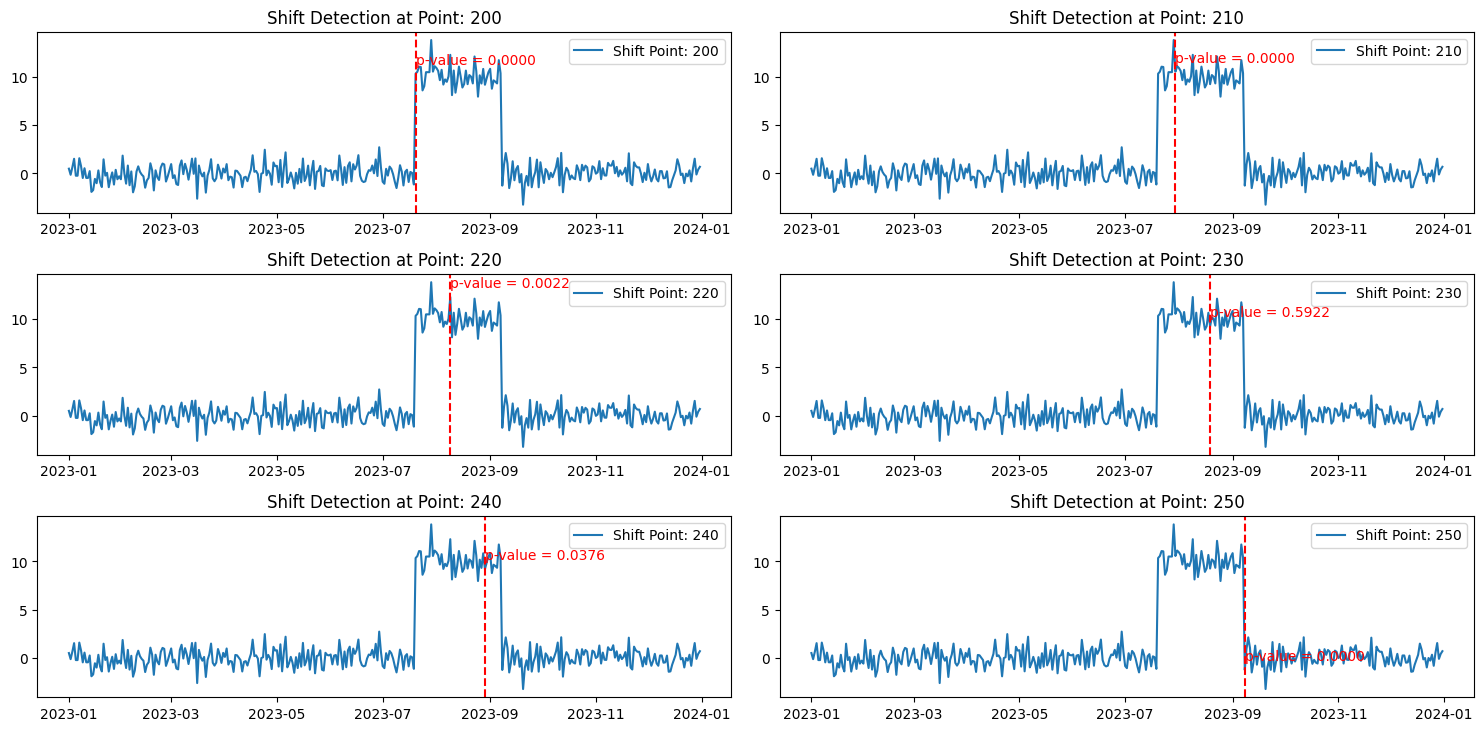

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def detect_shift_and_plot(data, shift_point):
    data_before_shift = data['Value'][:shift_point]
    data_after_shift = data['Value'][shift_point:]
    _, p_value = ttest_ind(data_before_shift, data_after_shift, alternative='two-sided')
    
    plt.plot(data.index, data['Value'], label=f'Shift Point: {shift_point}')
    plt.axvline(x=data.index[shift_point], color='red', linestyle='--')
    plt.annotate(f'p-value = {p_value:.4f}', xy=(data.index[shift_point], data['Value'][shift_point] + 1), color='red')

    if p_value < alpha:
        print(f"Shift at point {shift_point} is statistically significant.")
    else:
        print(f"No statistically significant shift detected at point {shift_point}.")


np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_shift = np.random.normal(loc=0, scale=1, size=len(date_rng))
data_shift[200:250] += 10

df_shift = pd.DataFrame(data_shift, columns=['Value'], index=date_rng)

alpha = 0.05

plt.figure(figsize=(15, 10))
for i, shift_point in enumerate(range(200, 251, 10)):
    plt.subplot(4, 2, i + 1)
    detect_shift_and_plot(df_shift, shift_point)
    plt.legend()
    plt.title(f'Shift Detection at Point: {shift_point}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

